ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #4
 
=====  ЧАСТЬ 1  =====
Подберите парамтеры алгоритма разрастания регионов так, 
чтобы был выделен весь участок газона.
--------------------------------------------------------------------------------


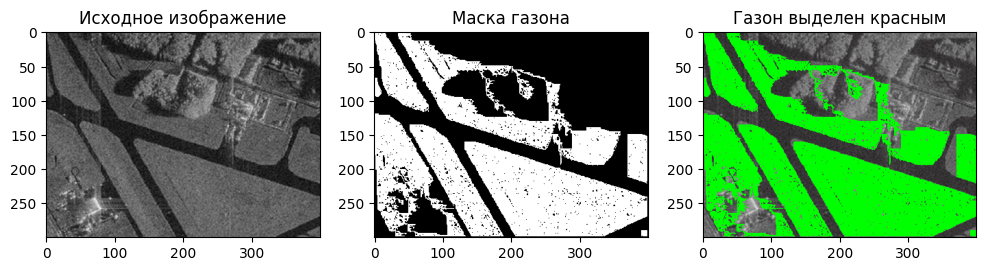


 ОТВЕТ: параметр T = 20


In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

print("="*50)
print("ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #4")
print("="*50)
print(" ") ###1 ЗАДАНИЕ : Подберите парамтеры алгоритма разрастания регионов так, чтобы был выделен весь участок газона.
print("="*5, " ЧАСТЬ 1 ", "="*5)
print("Подберите парамтеры алгоритма разрастания регионов так, \nчтобы был выделен весь участок газона.")
print("-"*80)

# Загружаем изображение
image = cv2.imread("sar_1.jpg")
if image is None:
    raise FileNotFoundError("Файл sar_1.jpg не найден!")

# Переводим в серый
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Функции
def homo_average(img, mask, point, T):
    region_vals = img[mask > 0]
    if len(region_vals) == 0:
        return True
    av_val = np.mean(region_vals)
    return abs(av_val - img[point]) <= T

def region_growing(image, seed_point, homo_fun, r, T):
    mask = np.zeros(image.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image.shape, np.uint8)
        for i in range(r, image.shape[0] - r):
            for j in range(r, image.shape[1] - r):
                if mask[i, j] == 0 and mask[i - r:i + r, j - r:j + r].sum() > 0:
                    if homo_fun(image, mask, (i, j), T):
                        local_mask[i, j] = 1
        count = np.count_nonzero(local_mask)
        mask += local_mask
    return mask * 255

# Несколько затравочных точек внутри газона
# (y, x) — координаты пикселей внутри разных полей
seed_points = [
    (0, 0),
    (136, 52),
    (0, 35),
    (68, 0),
    (150, 370),
    (140, 310),
    (154, 290),
    (290, 390),
    (120, 0),
    (161, 132)
]

# Запуск region growing для каждой затравки
final_mask = np.zeros(gray.shape, np.uint8)
for sp in seed_points:
    mask = region_growing(gray, sp, homo_average, r=1, T=20)
    final_mask = cv2.bitwise_or(final_mask, mask)

# Красим газон
result = image.copy()
result[final_mask > 0] = [0, 255, 0]

# Визуализация
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(gray, cmap="gray")
plt.title("Исходное изображение")

plt.subplot(1, 3, 2)
plt.imshow(final_mask, cmap="gray")
plt.title("Маска газона")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Газон выделен красным")

plt.show()

print("\n ОТВЕТ: параметр T = 20")
